# All Steps from Start to Finish

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from thesiscode.quality import *
from thesiscode.plotting import *
from scipy.stats import linregress

In [2]:
font = {'family' : 'normal',
        'size'   : 12,
        'weight' : 'heavy'}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10)
matplotlib.rcParams["ps.useafm"] = True
matplotlib.rcParams["pdf.use14corefonts"] = True
matplotlib.rcParams["text.usetex"] = True

In [3]:
def three_cell_plot(x1, x2, x3, y1, y2, y3, xlabel=None, xlims=None, ylabel=None,
                    ylims=None, txt1=None, txt2=None, txt3=None, inverted=False,
                    outfile=None, hzline=None, vertline=None):
    colors = ["b","r","g","y","purple","orange","black"]
    
    fig = plt.figure(figsize=(6,6))
    fig.subplots_adjust(left=0.1, right=0.95, top=0.95, bottom=0.1, wspace=0, hspace=0)

    ax = plt.subplot(221)
    for ii in range(len(x1)):
        ax.scatter(x1[ii], y1[ii], c=colors[ii], s=1, edgecolor="None")
    if txt1:
        ax.text(0.9, 0.9, txt1, transform=ax.transAxes, horizontalalignment="right")
    if hzline:
        ax.plot([xlims[0], xlims[1]], [hzline, hzline], linestyle="--", color='k')
    if vertline:
        ax.plot([vertline, vertline], [ylims[0], ylims[1]], linestyle="--", color='k')
    ax.set_xlim(xlims[0], xlims[1])
    ax.set_ylim(ylims[0], ylims[1])
    ax.set_ylabel(ylabel)
    if inverted:
        ax.invert_yaxis()
    ax.get_xaxis().set_ticklabels([])
    ax.minorticks_on()

    ax = plt.subplot(223)
    for ii in range(len(x2)):
        ax.scatter(x2[ii], y2[ii], c=colors[ii], s=1, edgecolor="None")
    if txt2:
        ax.text(0.9, 0.9, txt2, transform=ax.transAxes, horizontalalignment="right")
    if hzline:
        ax.plot([xlims[0], xlims[1]], [hzline, hzline], linestyle="--", color='k')
    if vertline:
        ax.plot([vertline, vertline], [ylims[0], ylims[1]], linestyle="--", color='k')
    ax.set_xlim(xlims[0], xlims[1])
    ax.set_ylim(ylims[0], ylims[1])
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if inverted:
        ax.invert_yaxis()
    ax.minorticks_on()

    ax = plt.subplot(224)
    for ii in range(len(x3)):
        ax.scatter(x3[ii], y3[ii], c=colors[ii], s=1, edgecolor="None")
    if txt3:
        ax.text(0.9, 0.9, txt3, transform=ax.transAxes, horizontalalignment="right")
    if hzline:
        ax.plot([xlims[0], xlims[1]], [hzline, hzline], linestyle="--", color='k')
    if vertline:
        ax.plot([vertline, vertline], [ylims[0], ylims[1]], linestyle="--", color='k')
    ax.set_xlim(xlims[0], xlims[1])
    ax.set_ylim(ylims[0], ylims[1])
    ax.set_xlabel(xlabel)
    ax.get_yaxis().set_ticklabels([])
    if inverted:
        ax.invert_yaxis()
    ax.minorticks_on()
    if outfile:
        plt.savefig(outfile)
    
    plt.show()

In [4]:
def two_cell_comparison(df1, df2, xcol, ycol,
                        xlabel, ylabel, xlim = [-0.2, 2.7], ylim = [-0.5, 2.0],
                        hzline = 0.2, slant=[(0.75, -0.33), (-1.,1.5)],
                        meet=1.3, outfile=None):
    
    adjust={"left": 0.09, "right":0.87, "top":0.97, "bottom":0.1, "hspace":0.35, "wspace":0.2}
    fig = plt.figure(figsize=(8,4))
    fig.subplots_adjust(left=adjust["left"], right=adjust["right"], top=adjust["top"], bottom=adjust["bottom"], hspace=adjust["hspace"], wspace=adjust["wspace"])

    df1 = agb_cuts(df1)
    df2 = agb_cuts(df2)
    
    ax1 = fig.add_subplot(121)

    ax1.scatter(df1[xcol], df1[ycol], s=10, c="None", edgecolor="k", marker="o")
    ax1.scatter(df2[xcol], df2[ycol], s=10, c="r", marker="x")

    for line in slant:
        x = np.linspace(xlim[0], xlim[1],10)
        y = line[0]*x + line[1]
        ax1.plot(x, y, color="#00FF00", linestyle="--")

    if hzline:
        ax1.plot([xlim[0], xlim[1]], [hzline, hzline], color="#00FF00", linestyle="--")
        ax1.fill_between([1.075, meet], [slant[1][0]*1.075 + slant[1][1], slant[1][0]*meet + slant[1][1]], [slant[0][0]*1.075 + slant[0][1], slant[0][0]*meet + slant[0][1]], color='k', alpha=0.5)    
        ax1.fill_between([meet, xlim[1]], [hzline, hzline], [slant[0][0]*meet + slant[0][1], slant[0][0]*xlim[1] + slant[0][1]], color='k', alpha=0.5)    

    ax1.set_xlabel(xlabel)
    ax1.set_xlim(xlim[0], xlim[1])
    ax1.set_ylabel(ylabel)
    ax1.set_ylim(ylim[0], ylim[1])
    ax1.minorticks_on()
    
    df1 = remove_ysos(df1)
    df2 = remove_ysos(df2)

    ax = fig.add_subplot(122)

    ax.scatter(df1[xcol], df1[ycol], s=10, c="None", edgecolor="k", marker="o")
    ax.scatter(df2[xcol], df2[ycol], s=10, c="r", marker="x")

    ax.set_xlabel(xlabel)
    ax.set_xlim(xlim[0], xlim[1])
    ax.set_ylim(ylim[0], ylim[1])
    ax.minorticks_on()

    if outfile:
        plt.savefig(outfile)

    plt.show()

In [5]:
def two_cell_plot(x1_arr, x2_arr, y1_arr, y2_arr, xlabels_arr=None, ylabels_arr=None, orientation="vertical", 
                  hist=False, xlim_arr=None, ylim_arr=None, dx=0.1, dy=0.1, cmap=plt.cm.gnuplot, 
                  cbar_title=None, vmin=0, vmax=10, multi=False, outfile=None):
    colors = ["k","b","r","g","purple","y","orange","black"]

    if orientation == "vertical":
        fig = plt.figure(figsize=(3,8))
    else:
        fig = plt.figure(figsize=(8,3))
        
    if hist:
        fig.subplots_adjust(left=0.09, right=0.85, top=0.97, bottom=0.1)
    else:
        fig.subplots_adjust(left=0.1, right=0.95, top=0.95, bottom=0.1)

    if orientation == "vertical":        
        ax1 = plt.subplot(211)
        ax2 = plt.subplot(212)
    else:
        ax1 = plt.subplot(121)
        ax2 = plt.subplot(122)
        
    if hist:
        dx = dx
        dy = dy

        if xlims_arr:
            xbins1 = np.arange(xlims_arr[0][0], xlims_arr[0][1] + dx, dx)
            xbins2 = np.arange(xlims_arr[1][0], xlims_arr[1][1] + dx, dx)
        else:
            xbins1 = np.arange(min(x1_arr), max(x1_arr) + dx, dx)
            xbins2 = np.arange(min(x2_arr), max(x2_arr) + dx, dx)
            
        if ylims_arr:
            ybins1 = np.arange(ylims_arr[0][0], ylims_arr[0][1] + dy, dy)
            ybins2 = np.arange(ylims_arr[1][0], ylims_arr[1][1] + dy, dy)
        else:
            ybins1 = np.arange(min(y1_arr), max(y1_arr) + dy, dy)
            ybins2 = np.arange(min(y2_arr), max(y2_arr) + dy, dy)

        H, xed, yed = np.histogram2d(x1_arr, y1_arr, bins=(xbins1, ybins1))
        extent = [xed[0], xed[-1], yed[0], yed[-1]]

        imap = ax1.imshow(np.log10(H.T), extent=extent, aspect="auto",
                         interpolation="nearest", origin="lower", cmap=cmap,
                         vmin=vmin, vmax=vmax)

        H, xed, yed = np.histogram2d(x2_arr, y2_arr, bins=(xbins2, ybins2))
        extent = [xed[0], xed[-1], yed[0], yed[-1]]

        ax2.imshow(np.log10(H.T), extent=extent, aspect="auto",
                         interpolation="nearest", origin="lower", cmap=cmap,
                         vmin=vmin, vmax=vmax)

        cax = fig.add_axes([0.86, 0.1, 0.04, 0.87]) 
        cbar = plt.colorbar(imap, cax = cax)
        cbar.ax.set_ylabel(cbar_title, fontsize=12)

    else:
        if multi:
            for ii in range(len(x1_arr)):
                ax1.scatter(x1_arr[ii], y1_arr[ii], s=2, c=colors[ii], edgecolor="None")
                
            for ii in range(len(x2_arr)):
                ax2.scatter(x2_arr[ii], y2_arr[ii], s=2, c=colors[ii], edgecolor="None")
        else:
            ax1.scatter(x1_arr, y1_arr, s=2, c='k', edgecolor="None")
            ax2.scatter(x2_arr, y2_arr, s=2, c='k', edgecolor="None")


    if xlim_arr:
        ax1.set_xlim(xlim_arr[0][0], xlim_arr[0][1])
        ax2.set_xlim(xlim_arr[1][0], xlim_arr[1][1])
    if xlabels_arr:
        ax1.set_xlabel(xlabels_arr[0], fontsize=10)
        ax2.set_xlabel(xlabels_arr[1], fontsize=10)
        
    if ylim_arr:
        ax1.set_ylim(ylim_arr[0][0], ylim_arr[0][1])
        ax2.set_ylim(ylim_arr[1][0], ylim_arr[1][1])
    if ylabels_arr:
        ax1.set_ylabel(ylabels_arr[0], fontsize=10)
        ax2.set_ylabel(ylabels_arr[1], fontsize=10)

    ax1.minorticks_on()
    ax2.minorticks_on()

    if outfile:
        plt.savefig(outfile)
    plt.show()

In [6]:
def plot_comparison(df1, df2, cuts=None, vmin=1E-2, cmap=plt.cm.gnuplot2,
                    outfile=None, binsize=0.1, interpolation="nearest",
                    figsize=(8, 4.5), w23hi=None, w23lo=None, jklim=None,
                    upper=None):

    if type(cuts) != type(None):
        df1 = df1[cuts]
    
    dx = binsize
    dy = binsize
    
    xbins = np.arange(275, 286+dx, dx)
    ybins = np.arange(-39, -27+dy, dy)
    H1, xedges, yedges = np.histogram2d(df1.glon, df1.glat, bins=(xbins, ybins))
    H2, xedges, yedges = np.histogram2d(df2.glon, df2.glat, bins=(xbins, ybins))
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    
    fig = plt.figure(figsize=figsize)
    fig.subplots_adjust(wspace=0.25, hspace=0.25, left=0.09, right=0.85, top=0.97, bottom=0.1)
    ax = plt.subplot2grid((2,2),(0,0),colspan=2)

    imap = ax.imshow((H1/H2).T, extent=extent, aspect="auto", interpolation=interpolation, cmap=cmap, origin="lower", vmin=vmin, vmax=1.0)
    completeness_string = "Completeness: %.2f%%" % (len(df1)/float(len(df2)) * 100)
    ax.text(0.9,0.9, completeness_string, transform=ax.transAxes, horizontalalignment="right")
        
    ax.set_xlim(275.5, 285.5)
    ax.set_xlabel("gal $l$ (deg)")
    ax.set_ylim(-40, -25)
    ax.set_ylabel("gal $b$ (deg)")
    ax.minorticks_on()

    
    ax = plt.subplot2grid((2,2),(1,0))
    xcolor1 = df1.col23
    xcolor2 = df2.col23
    ycolor1 = df1.coljk
    ycolor2 = df2.coljk
    dx = dy = 0.1
    
    xbins = np.arange(-4, 5.+dx, dx)
    ybins = np.arange(-4, 5.+dy, dy)

    H1, xedges, yedges = np.histogram2d(xcolor1, ycolor1, bins=(xbins, ybins))
    H2, xedges, yedges = np.histogram2d(xcolor2, ycolor2, bins=(xbins, ybins))
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    ax.imshow((H1/H2).T, extent=extent, aspect="auto", interpolation=interpolation, cmap=cmap, origin="lower", vmin=vmin, vmax=1.0)

    if jklim:
        ax.plot([-1,4],[jklim,jklim],linestyle="--",color='white', linewidth=2)
    if w23hi:
        ax.plot([w23hi,w23hi],[-2,6],linestyle="--",color='k', linewidth=2)
    if w23lo:
        print w23lo
        ax.plot([w23lo,w23lo],[-2,6],linestyle="--",color='k', linewidth=2)

    ax.set_xlim(-0.5, 3.9)
    ax.set_xlabel("W2 - W3")
    ax.set_xticks(np.arange(0, 4.+1., 1.))
    ax.set_ylabel("J - K$_s$")
    ax.set_yticks(np.arange(0, 4.+1., 1.))
    ax.set_ylim(0.5, 4.4)
    ax.minorticks_on()

    ax = plt.subplot2grid((2,2),(1,1))
    xcolor1 = df1.col23
    xcolor2 = df2.col23
    ycolor1 = df1.col12
    ycolor2 = df2.col12
    dx = 0.1
    dy = 0.05
    
    xbins = np.arange(-0.5, 3.9+dx, dx)
    ybins = np.arange(-0.5, 3.9+dy, dy)
    
    H1, xedges, yedges = np.histogram2d(xcolor1, ycolor1, bins=(xbins, ybins))
    H2, xedges, yedges = np.histogram2d(xcolor2, ycolor2, bins=(xbins, ybins))
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    ax.imshow((H1/H2).T, extent=extent, aspect="auto", interpolation=interpolation, cmap=cmap, origin="lower", vmin=vmin, vmax=1.0)
    if w23hi:
        ax.plot([w23hi,w23hi],[-2,6],linestyle="--",color='k', linewidth=2)
    if w23lo:
        ax.plot([w23lo,w23lo],[-2,6],linestyle="--",color='k', linewidth=2)
    if upper:
        m = upper[0]
        b = upper[1]
        ax.plot(xbins, xbins*m + b, linestyle="--", color='k', linewidth=2)
        
    ax.set_xlim(-0.5, 3.9)
    ax.set_xlabel("W2-W3")
    ax.set_ylim(-0.5, 1.9)
    ax.set_ylabel("W1-W2")
    ax.minorticks_on()

    cax = fig.add_axes([0.86, 0.1, 0.04, 0.87]) 
    cbar = plt.colorbar(imap, cax = cax, ticks=np.arange(vmin, 1.0+0.1, 0.1))

    cbar.ax.set_ylabel("Completeness Fraction", fontsize=12)
    
    if outfile:
        plt.savefig(outfile)

    plt.show()

In [7]:
def color_and_map(df, vmin=0, vmax=5, cmap=plt.cm.gnuplot2, outfile=None,
                  dx_map=2, dy_map=2, interpolation="nearest",
                  figsize=(8, 4.5), xlims_map=None, ylims_map=None,
                  xlims_color=[[0.0, 2.5], [0.0, 2.5]],
                  ylims_color=[[0.5, 3.5], [-0.5, 2.0]]):
    
    dx = dx_map
    dy = dy_map
    
    if xlims_map:
        xbins = np.arange(xlims_map[0], xlims_map[1]+dx, dx)
    else:
        xbins = np.arange(275, 286+dx, dx)
        
    if ylims_map:
        ybins = np.arange(ylims_map[0], ylims_map[1]+dy, dy)
    else:
        ybins = np.arange(-39, -27+dy, dy)
    
    H, xedges, yedges = np.histogram2d(df.glon, df.glat,
                                       bins=(xbins, ybins))
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    
    fig = plt.figure(figsize=figsize)
    fig.subplots_adjust(wspace=0.25, hspace=0.25, left=0.09,
                        right=0.85, top=0.97, bottom=0.1)
    ax = plt.subplot2grid((2,2), (0,0), colspan=2)

    imap = ax.imshow(np.log10(H.T), extent=extent, aspect="auto",
                     interpolation=interpolation, cmap=cmap,
                     origin="lower", vmin=vmin, vmax=vmax)
        
    ax.set_xlim(xbins[0], xbins[-1])
    ax.set_ylim(ybins[0], ybins[-1])
    ax.set_xlabel("gal $l$ (deg)")
    ax.set_ylabel("gal $b$ (deg)")
    ax.minorticks_on()

    
    ax = plt.subplot2grid((2,2),(1,0))
    xcolor = df.col23
    ycolor = df.coljk
    
    dx = dy = 0.1
    
    xbins = np.arange(xlims_color[0][0], xlims_color[0][1]+dx, dx)
    ybins = np.arange(ylims_color[0][0], ylims_color[0][1]+dy, dy)

    H, xedges, yedges = np.histogram2d(xcolor, ycolor,
                                        bins=(xbins, ybins))
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    ax.imshow(np.log10(H).T, extent=extent, aspect="auto",
              interpolation=interpolation, cmap=cmap, origin="lower",
              vmin=vmin, vmax=vmax)

    ax.set_xlim(xbins[0], xbins[-1])
    ax.set_xlabel("W2 - W3")
    ax.set_xticks(np.arange(0, 4.+1., 1.))
    ax.set_ylim(ybins[0], ybins[-1])
    ax.set_ylabel("J - K$_s$")
    ax.set_yticks(np.arange(0, 4.+1., 1.))
    ax.minorticks_on()

    ax = plt.subplot2grid((2,2),(1,1))
    xcolor = df.col23
    ycolor = df.col12
    dx = 0.1
    dy = 0.05
    
    xbins = np.arange(xlims_color[1][0], xlims_color[1][1]+dx, dx)
    ybins = np.arange(ylims_color[1][0], ylims_color[1][1]+dy, dy)
    
    H, xedges, yedges = np.histogram2d(xcolor, ycolor, bins=(xbins, ybins))
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    ax.imshow(np.log10(H).T, extent=extent, aspect="auto",
              interpolation=interpolation, cmap=cmap, origin="lower", vmin=vmin, vmax=1.0)
        
    ax.set_xlim(xbins[0], xbins[-1])
    ax.set_xlabel("W2-W3")
    ax.set_ylim(ybins[0], ybins[-1])
    ax.set_ylabel("W1-W2")
    ax.minorticks_on()

    cax = fig.add_axes([0.86, 0.1, 0.04, 0.87]) 
    cbar = plt.colorbar(imap, cax = cax, ticks=np.linspace(vmin, vmax, 10))
    
    if outfile:
        plt.savefig(outfile)

    plt.show()

In [8]:
def galactic_plot(xvals, yvals, xlims=(-179, 179), ylims=(-89, 89),
                 hist=False, cbar=False, outfile=None, dx=1., dy=1., multi=False, cmap=plt.cm.gnuplot):

    colors = ["b","r","g","y","purple","orange","black"]

    fig = plt.figure(figsize=(6,6))
    if hist:
        fig.subplots_adjust(left=0.09, right=0.85, top=0.97, bottom=0.1)
    else:
        fig.subplots_adjust(left=0.1, right=0.95, top=0.95, bottom=0.1, wspace=0, hspace=0)
        
    ax = plt.subplot(111)
    if hist:
        dx = dx
        dy = dy
        xbins = np.arange(xlims[0], xlims[-1] + dx, dx)
        ybins = np.arange(ylims[0], ylims[-1] + dy, dy)
        
        H, xed, yed = np.histogram2d(xvals, yvals, bins=(xbins, ybins))
        extent = [xed[0], xed[-1], yed[0], yed[-1]]
        
        imap = ax.imshow(np.log10(H.T), extent=extent, aspect="auto",
                  interpolation="nearest", origin="lower", cmap=cmap)
        
        if cbar:
            cax = fig.add_axes([0.86, 0.1, 0.04, 0.87]) 
            cbar = plt.colorbar(imap, cax = cax)
            cbar.ax.set_ylabel("$N_{stars}$ deg$^{-2}$", fontsize=12)

    else:
        if multi:
            for ii in range(len(xvals)):
                ax.scatter(xvals[ii], yvals[ii], s=2, edgecolor="None", c=colors[ii])
                
        else:
            ax.scatter(xvals, yvals, s=2, edgecolor="None", c='k')
    
    ax.set_xlim(xlims[0], xlims[1])
    ax.set_ylim(ylims[0], ylims[1])
    ax.set_xlabel("gal $l$")
    ax.set_ylabel("gal $b$")
    ax.minorticks_on()
    
    if outfile:
        plt.savefig(outfile)
    plt.show()

In [9]:
def overplot_distr(df_bkg, df_top, figsize=(6,6), adjust={"left": 0.09, "right":0.85, "top":0.97, "bottom":0.1, "hspace":0.35, "wspace":0.2}, 
                   galactic=False, size=10, savefig=None, colorbar=False):
    fig = plt.figure(figsize=figsize)
    fig.subplots_adjust(left=adjust["left"], right=adjust["right"], top=adjust["top"], bottom=adjust["bottom"], hspace=adjust["hspace"], wspace=adjust["wspace"])
    
    if galactic:
        xlim = [np.round(np.min(df_bkg.glon), 1), np.round(np.max(df_bkg.glon), 1)]
        ylim = [np.round(np.min(df_bkg.glat), 1), np.round(np.max(df_bkg.glat), 1)]

        xbins = np.arange(xlim[0], xlim[1]+0.25, 0.25)
        ybins = np.arange(ylim[0], ylim[1]+0.25, 0.25)
        H_bkg, xed, yed = np.histogram2d(df_bkg.glon, df_bkg.glat, bins=(xbins, ybins))
        extent = [xed[0], xed[-1], yed[0], yed[-1]]

        ax1 = plt.subplot(111)    
        imap = ax1.imshow(np.log10(H_bkg.T), aspect="auto", extent=extent, interpolation="nearest", origin="lower", cmap=plt.cm.Greys_r)
        ax1.scatter(df_top.glon, df_top.glat, s=size, c='r', marker="x")

        if colorbar:
            cax = fig.add_axes([0.86, 0.1, 0.04, 0.87]) 
            cbar = plt.colorbar(imap, cax = cax)
            cbar.ax.set_ylabel("log$_{10}$ N objects", fontsize=12)

        #============ formatting

        ax1.set_xlabel("gal l (deg)")
        ax1.set_xlim(xlim[0], xlim[1])
        ax1.set_ylabel("gal b (deg)")
        ax1.set_ylim(ylim[0], ylim[1])
        ax1.minorticks_on()    
        
    else:
        xlim = [np.round(np.min(df_bkg.ra), 1), np.round(np.max(df_bkg.ra), 1)]
        ylim = [np.round(np.min(df_bkg.decl), 1), np.round(np.max(df_bkg.decl), 1)]

        xbins = np.arange(xlim[0], xlim[1]+0.25, 0.25)
        ybins = np.arange(ylim[0], ylim[1]+0.25, 0.25)
        H_bkg, xed, yed = np.histogram2d(df_bkg.ra, df_bkg.decl, bins=(xbins, ybins))
        extent = [xed[0], xed[-1], yed[0], yed[-1]]

        ax1 = plt.subplot(111)    
        imap = ax1.imshow(np.log10(H_bkg.T), aspect="auto", extent=extent, interpolation="nearest", origin="lower", cmap=plt.cm.Greys_r)
        ax1.scatter(df_top.ra, df_top.decl, s=size, c='r', marker="x")

        if colorbar:
            cax = fig.add_axes([0.86, 0.1, 0.04, 0.87]) 
            cbar = plt.colorbar(imap, cax = cax)
            cbar.ax.set_ylabel("log$_{10}$ N objects", fontsize=12)


        #============ formatting

        ax1.set_xlabel("RA (deg)")
        ax1.set_xlim(xlim[0], xlim[1])
        ax1.set_ylabel("Dec (deg)")
        ax1.set_ylim(ylim[0], ylim[1])
        ax1.minorticks_on()


    if savefig:
        plt.savefig("../figures/"+savefig)
    plt.show()

In [10]:
def compare_color_color(df1, df2, x_color, y_color, xtit=None, ytit=None, figsize=(6,6), adjust={"left": 0.09, "right":0.87, "top":0.97, "bottom":0.1, "hspace":0.35, "wspace":0.2}, color1="k", color2="r",
                    xbounds=False, ybounds=False, hzline=None, slant=None, vline=None, savefig=None):
    fig = plt.figure(figsize=figsize)
    fig.subplots_adjust(left=adjust["left"], right=adjust["right"], top=adjust["top"], bottom=adjust["bottom"], hspace=adjust["hspace"], wspace=adjust["wspace"])
    
    if xbounds == False:
        xlim = [np.round(np.min(df1[x_color]), 1), np.round(np.max(df1[x_color]), 1)]
    else:
        xlim = [xbounds[0], xbounds[1]]
        
    if ybounds == False:
        ylim = [np.round(np.min(df1[y_color]), 1), np.round(np.max(df1[y_color]), 1)]
    else:
        ylim = [ybounds[0], ybounds[1]]
    
    ax = fig.add_subplot(111)
        
    ax.scatter(df1[x_color], df1[y_color], s=10, c="None", edgecolor=color1, marker="o")
    ax.scatter(df2[x_color], df2[y_color], s=10, c=color2, marker="x")
    
    if hzline:
        ax.plot([xlim[0], xlim[1]], [hzline,hzline], color="#00FF00", linestyle="--")
    if slant:
        x = np.linspace(xlim[0],xlim[1],10)
        for line in slant:
            y = line[0]*x + line[1]
            ax.plot(x, y, color="#00FF00", linestyle="--")
    if vline:
        ax.plot([vline,vline], [ylim[0], ylim[1]], color="#00FF00", linestyle="--")
        
    ax.set_xlabel(xtit)
    ax.set_xlim(xlim[0], xlim[1])
    ax.set_ylabel(ytit)
    ax.set_ylim(ylim[0], ylim[1])
    ax.minorticks_on()
    
    if savefig:
        plt.savefig("../figures/"+savefig)

    plt.show()

In [11]:
def read_gator(infile):
    readin = open(infile,'r').readlines()
    data = readin[82:]

    columns = readin[78].split('|')
    colnames = []

    data_dict = {}

    for ii in range(1,len(columns)-1):
        the_name = columns[ii].strip()
        colnames.append(the_name)
        data_dict[the_name] = []

    for ii in range(len(data)):
        line = data[ii].split()
        for jj in range(len(colnames)):
            data_dict[colnames[jj]].append(line[jj])

    df = pd.DataFrame(data_dict)
    df = df.replace("null", np.nan)
    
    rename_these = {
        "designation":"wisename","cc_flags":"ccflag", 
        "dec":"decl","ext_flg":"extflg","w1mpro":"w1", 
        "w2mpro":"w2", "w3mpro":"w3", "w4mpro":"w4",
        "w1sigmpro":"w1err", "w2sigmpro":"w2err", 
        "w3sigmpro":"w3err", "w4sigmpro":"w4err",
        "j_m_2mass":"jmag", "h_m_2mass":"hmag", 
        "k_m_2mass":"kmag", "j_msig_2mass":"jerr", 
        "h_msig_2mass":"herr", "k_msig_2mass":"kerr",
        "n_2mass":"n2mass", "r_2mass":"r2mass", 
        "var_flg":"varflg"
        }
    df.rename(columns=rename_these, inplace=True)

    retype_these = "decl,ra,w1,w2,w3,w4,w1err,w2err,w3err,w4err,w1snr,w2snr,w3snr,w4snr,jmag,hmag,kmag,jerr,herr,kerr,n2mass,r2mass,extflg,glon,glat,sigra,sigdec,sigradec"
    retype_these = retype_these.split(",")
    df[retype_these] = df[retype_these].astype(float)
    
    df = add_colors(df)
    
    return df

In [12]:
def add_colors_ogle(df):
    ## Pack the dataframe with necessary colors
    df["coljh"] = df.jmag - df.hmag
    df["coljk"] = df.jmag - df.kmag
    df["colhk"] = df.hmag - df.kmag
    df["colvi"] = df.V - df.I
    
    df.glon = df[df.glon > 180].glon - 360
    df = df[df.glon < -70]
    
    return df

In [13]:
def add_colors(df):
    df["coljh"] = df.jmag - df.hmag
    df["coljk"] = df.jmag - df.kmag
    df["colj1"] = df.jmag - df.w1
    df["colj2"] = df.jmag - df.w2
    df["colj3"] = df.jmag - df.w3
    df["colhk"] = df.hmag - df.kmag
    df["colh1"] = df.hmag - df.w1
    df["colh2"] = df.hmag - df.w2
    df["colh3"] = df.hmag - df.w3
    df["colk1"] = df.kmag - df.w1
    df["colk2"] = df.kmag - df.w2
    df["colk3"] = df.kmag - df.w3
    df["col12"] = df.w1 - df.w2
    df["col13"] = df.w1 - df.w3
    df["col23"] = df.w2 - df.w3

    return df

In [14]:
def add_colors_multisurvey(df):
    ## Pack the dataframe with necessary colors
    df["coljh"] = df.wjmag - df.whmag
    df["coljk"] = df.wjmag - df.wkmag
    df["colj1"] = df.wjmag - df.w1
    df["colj2"] = df.wjmag - df.w2
    df["colj3"] = df.wjmag - df.w3
    df["colj4"] = df.wjmag - df.w4

    df["colhk"] = df.whmag - df.wkmag
    df["colh1"] = df.whmag - df.w1
    df["colh2"] = df.whmag - df.w2
    df["colh3"] = df.whmag - df.w3
    df["colh4"] = df.whmag - df.w4

    df["colk1"] = df.wkmag - df.w1
    df["colk2"] = df.wkmag - df.w2
    df["colk3"] = df.wkmag - df.w3
    df["colk4"] = df.wkmag - df.w4

    df["col12"] = df.w1 - df.w2
    df["col13"] = df.w1 - df.w3
    df["col14"] = df.w1 - df.w4
    df["col23"] = df.w2 - df.w3
    df["col24"] = df.w2 - df.w4
    df["col34"] = df.w3 - df.w4

    df.wglon = df[df.wglon > 180].wglon - 360
    df = df[df.wglon < -70]

    return df

In [15]:
def photo_cuts(df):
    sat = {"w1":2.0, "w2":1.5, "w3":-3.0, "k":8.5}
    fnt = {"w1":16.83, "w2":15.6, "w3":11.32, "k":15.5}
    snr = 3
    
    cuts = (df.w1 > sat["w1"]) & (df.w2 > sat["w2"]) & (df.w3 > sat["w3"]) & (df.kmag > sat["k"]) & (df.w1 < fnt["w1"]) & (df.w2 < fnt["w2"]) & (df.w3 < fnt["w3"]) & (df.kmag < fnt["k"]) & (df.w1snr > snr) & (df.w2snr > snr) & (df.w3snr > snr) & (df.ccflag.map(lambda flag: flag.startswith("000")))

    return df[cuts]

In [16]:
def agb_cuts(df):
    cuts = (df.coljk > 1.1) & (df.col23 < 2.5) & (df.col23 > -0.1) & (df.col12 < 0.8 * df.col23 + 0.28)
    
    return df[cuts]

In [17]:
def remove_ysos(df):
    cuts = (df.col12 < 0.2) | (df.col12 > 0.75*df.col23 - 0.33) | (df.col12 < -1. * df.col23 + 1.5)
    
    return df[cuts]

In [18]:
def standardize(df):
    df = remove_ysos(agb_cuts(photo_cuts(add_colors(df))))
    df.glon[df.glon > 180] = df.glon[df.glon > 180] - 360
    
    return df

In [19]:
class single_pop_table:
    def __init__(self, df, table_title, cut_titles=None, cut_array=None):
        self.original = df
        self.original_number = len(df)
        self.cuts = []
        self.has_keys = False
        self.compounded_titles = False
        self.table_title = table_title
        if cut_titles:
            self.has_keys = True
            for ii in range(len(cut_titles)):
                self.cuts.append([cut_titles[ii], cut_array[ii]]) 
        
    def add_cut(self, new_cut_title, new_cut):
        self.has_keys = True
        self.cuts.append([new_cut_title, new_cut]) 
        
    def list_cuts(self):
        outstr = self.table_title + "\n"
        outstr += "=========================================================\n"
        outstr += "Original:\t\t\t{0}\n".format(self.original_number)
        
        if self.has_keys:
            for ii in range(len(self.cuts)):
                outstr += "+ {0}:\t\t{1}\n".format(self.cuts[ii][0], sum(self.cuts[ii][1]))

        outstr += "=========================================================\n"
        print outstr
            
    def compound_cuts(self):
        all_cuts = self.cuts
        compounded_titles = [all_cuts[0][0]]
        compounded_sequence = [all_cuts[0][1]]
        
        for ii in range(1, len(all_cuts)):
            compounded_sequence.append(compounded_sequence[ii-1] &
                                      all_cuts[ii][1])
            compounded_titles.append(all_cuts[ii][0])
                
        self.compounded_sequence = compounded_sequence
        self.compounded_titles = compounded_titles
        
    def list_compounded_cuts(self):
        if self.compounded_titles:
            titles = self.compounded_titles
            results = self.compounded_sequence
            
        else:
            self.compound_cuts()
            titles = self.compounded_titles
            results = self.compounded_sequence

        outstr = self.table_title + "\n"
        outstr += "=========================================================\n"
        outstr += "Cut\t\t\t\tCount\t% Retention\n"
        outstr += "---------------------------------------------------------\n"
        outstr += "Original:\t\t\t{0}\t100.00\n".format(self.original_number)

        for ii in range(len(titles)):
            outstr += "+ {0}:\t\t{1}\t{2}\n".format(titles[ii], sum(results[ii]), sum(results[ii])/float(self.original_number) * 100)

        outstr += "=========================================================\n"
        print outstr

    def get_compounded_cuts(self):
        if self.compounded_titles:
            cuts = self.compounded_sequence[-1]
        
        else:
            self.compound_cuts()
            cuts = self.compounded_sequence[-1]
            
        return self.original[cuts]
        
#     def cuts_as_latex(self):
        

## OGLE-III Catalog of Variable Stars
- Added Weisenheit $I$ magnitudes, defined as
$$W_I = I-1.55(V-I)$$

In [8]:
ogle_2mass = add_colors_ogle(pd.read_csv("../samples/ogle_2mass_original.dat"))
ogle_wise = add_colors_multisurvey(pd.read_csv("../samples/ogle_2mass_allwise_alldata.dat", sep=","))


In [9]:
miras = ogle_2mass.Type == "Mira"
osargs = ogle_2mass.Type == "OSARG"
srvs = ogle_2mass.Type == "SRV"
orich = ogle_2mass.Spectr == "O-rich"
crich = ogle_2mass.Spectr == "C-rich"

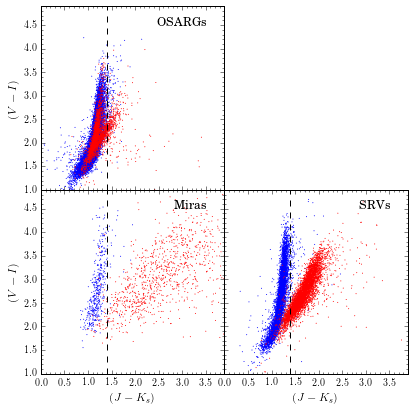

In [10]:
three_cell_plot((ogle_2mass[osargs & orich].coljk, ogle_2mass[osargs & crich].coljk), 
                (ogle_2mass[miras & orich].coljk, ogle_2mass[miras & crich].coljk),
                (ogle_2mass[srvs & orich].coljk, ogle_2mass[srvs & crich].coljk), 
                (ogle_2mass[osargs & orich].colvi, ogle_2mass[osargs & crich].colvi),
                (ogle_2mass[miras & orich].colvi, ogle_2mass[miras & crich].colvi), 
                (ogle_2mass[srvs & orich].colvi, ogle_2mass[srvs & crich].colvi),
                xlabel="$(J-K_s)$", ylabel="$(V-I)$", xlims=[0.0, 3.9],
                ylims=[1.0, 4.9], txt1="OSARGs", txt2="Miras", txt3="SRVs",
                vertline=1.4)

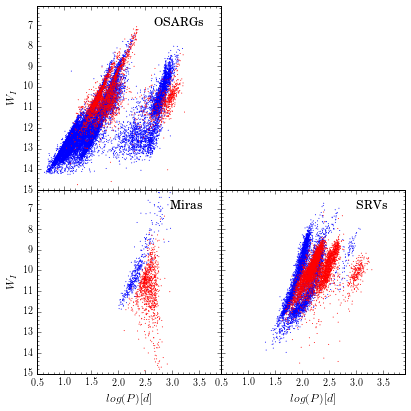

In [11]:
three_cell_plot((np.log10(ogle_2mass[osargs & orich].P_1), np.log10(ogle_2mass[osargs & crich].P_1)), 
                (np.log10(ogle_2mass[miras & orich].P_1), np.log10(ogle_2mass[miras & crich].P_1)),
                (np.log10(ogle_2mass[srvs & orich].P_1), np.log10(ogle_2mass[srvs & crich].P_1)), 
                (ogle_2mass[osargs & orich].W_I, ogle_2mass[osargs & crich].W_I),
                (ogle_2mass[miras & orich].W_I, ogle_2mass[miras & crich].W_I), 
                (ogle_2mass[srvs & orich].W_I, ogle_2mass[srvs & crich].W_I),
                xlabel="$log(P)[d]$", ylabel="$W_I$", xlims=[0.5, 3.9],
                ylims=[6.1, 15], txt1="OSARGs", txt2="Miras", txt3="SRVs", inverted=True)

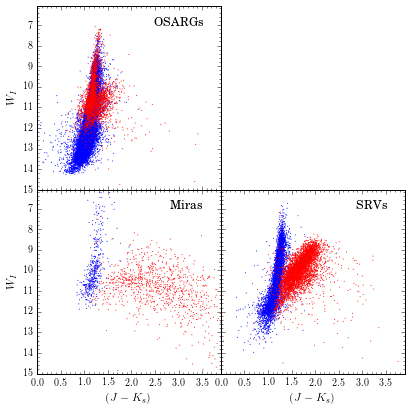

In [12]:
three_cell_plot((ogle_2mass[osargs & orich].coljk, ogle_2mass[osargs & crich].coljk), 
                (ogle_2mass[miras & orich].coljk, ogle_2mass[miras & crich].coljk),
                (ogle_2mass[srvs & orich].coljk, ogle_2mass[srvs & crich].coljk), 
                (ogle_2mass[osargs & orich].W_I, ogle_2mass[osargs & crich].W_I),
                (ogle_2mass[miras & orich].W_I, ogle_2mass[miras & crich].W_I), 
                (ogle_2mass[srvs & orich].W_I, ogle_2mass[srvs & crich].W_I),
                xlabel="$(J-K_s)$", ylabel="$W_I$", xlims=[0.0, 3.9],
                ylims=[6.1, 15], txt1="OSARGs", txt2="Miras", txt3="SRVs", inverted=True)

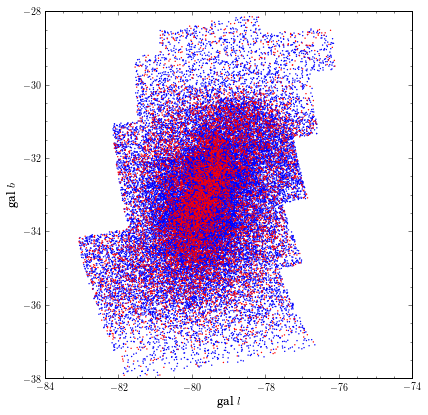

In [13]:
galactic_plot([ogle_2mass[orich].glon, ogle_2mass[crich].glon], 
              [ogle_2mass[orich].glat, ogle_2mass[crich].glat], multi=True,
              xlims=[-84, -74], ylims=[-38, -28])

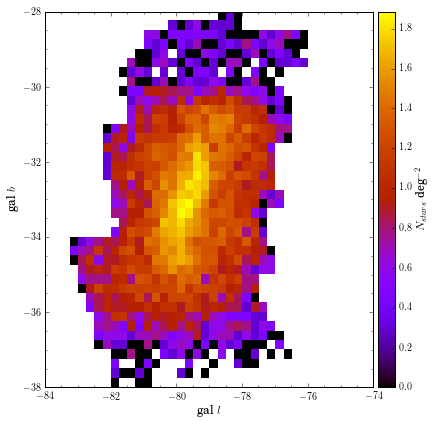

In [14]:
galactic_plot(ogle_2mass[crich].glon, 
              ogle_2mass[crich].glat,
              xlims=[-84, -74], ylims=[-38, -28], hist=True, cbar=True, dx=0.25, dy=0.25)

In [15]:
lmc_table = single_pop_table(ogle_2mass, "OGLE-2MASS AGB Stars")

In [16]:
lmc_table.add_cut("I-mag Sat. Limit", ogle_2mass.I > 12.5)
lmc_table.add_cut("K-mag Faint Limit", ogle_2mass.kmag < 15.5)
lmc_table.add_cut("J-mag Sat. Limit", ogle_2mass.jmag > 1.)
lmc_table.add_cut("K-mag Faint Limit", ogle_2mass.jmag > 8.5)
lmc_table.list_compounded_cuts()

OGLE-2MASS AGB Stars
Cut				Count	% Retention
---------------------------------------------------------
Original:			46431	100.00
+ I-mag Sat. Limit:		46393	99.9181581271
+ K-mag Faint Limit:		46393	99.9181581271
+ J-mag Sat. Limit:		46393	99.9181581271
+ K-mag Faint Limit:		46393	99.9181581271



In [141]:
lmc_wise_table = single_pop_table(ogle_wise, 'OGLE-WISE Matches < 3"')

In [142]:
lmc_wise_table.add_cut("I-mag faint limit", ogle_wise.I > 12.5)
lmc_wise_table.add_cut("2MASS counterparts", ogle_wise.n2mass == 1)
lmc_wise_table.add_cut("W1-W3 sat. limits", (ogle_wise.w1 > 2.) & (ogle_wise.w2 > 1.5) & (ogle_wise.w3 > -3))
lmc_wise_table.add_cut("K saturation limit", ogle_wise.kmag > 8.5)
lmc_wise_table.add_cut("W1 faint limit", ogle_wise.w1 < 16.83)
lmc_wise_table.add_cut("W2 faint limit", ogle_wise.w2 < 15.6)
lmc_wise_table.add_cut("W3 faint limit", ogle_wise.w3 < 11.32)
lmc_wise_table.add_cut("K faint limit", ogle_wise.kmag < 15.5)
lmc_wise_table.add_cut("W1-W3 SNR > 3", (ogle_wise.w1snr > 3) & (ogle_wise.w2snr > 3) & (ogle_wise.w3snr > 3))
lmc_wise_table.add_cut("CC [W1/2/3] = 0", ogle_wise.ccflag.map(lambda flag: flag.startswith("000")))
lmc_wise_table.list_compounded_cuts()

OGLE-WISE Matches < 3"
Cut				Count	% Retention
---------------------------------------------------------
Original:			44013	100.00
+ I-mag faint limit:		43975	99.9136618726
+ 2MASS counterparts:		43209	98.1732669893
+ W1-W3 sat. limits:		43209	98.1732669893
+ K saturation limit:		43201	98.1550905414
+ W1 faint limit:		43201	98.1550905414
+ W2 faint limit:		43200	98.1528184854
+ W3 faint limit:		19358	43.9824597278
+ K faint limit:		19358	43.9824597278
+ W1-W3 SNR > 3:		18995	43.1577034058
+ CC [W1/2/3] = 0:		8454	19.2079612842



## SDSS Value-added Galaxy Catalog & Luminous Red Giant Survey

In [126]:
vagc = add_colors(pd.read_csv("../contaminants/vagc_allwise_allmags.dat", sep="\t"))
lrgs = add_colors(pd.read_csv("../contaminants/lrg_allwise_allmags.dat", sep="\t"))

qso = vagc.CLASS == "QSO"
agn = (vagc.SUBCLASS == "AGN") | (vagc.SUBCLASS == " BROADLINE")
sfgal = (vagc.SUBCLASS == "STARFORMING") | (vagc.SUBCLASS == " BROADLINE")
sbgal = (vagc.SUBCLASS == "STARBURST") | (vagc.SUBCLASS == " BROADLINE")

vagc_cuts_table = single_pop_table(vagc, "Value-added Galaxy Catalog Objects Total matched to WISE")
qso_table = single_pop_table(vagc[qso], "VAGC QSOs matched to WISE")
agn_table = single_pop_table(vagc[agn], "VAGC AGN matched to WISE")
sfgal_table = single_pop_table(vagc[sfgal], "VAGC SFGal matched to WISE")
sbgal_table = single_pop_table(vagc[sbgal], "VAGC SBGal matched to WISE")
lrgs_table = single_pop_table(lrgs, "LRG Sample matched to WISE")

In [127]:
# vagc_cuts_table.original_number = 441707
vagc_cuts_table.add_cut("N=1 matches to 2MASS", vagc.n2mass == 1)
vagc_cuts_table.add_cut("WISE saturation lims", (vagc.w1 > 2.) & (vagc.w2 > 1.5) & (vagc.w3 > -3))
vagc_cuts_table.add_cut("WISE saturation w/ K", vagc.kmag > 8.5)
vagc_cuts_table.add_cut("WISE W1 faint limit", vagc.w1 < 16.83)
vagc_cuts_table.add_cut("WISE W2 faint limit", vagc.w2 < 15.6)
vagc_cuts_table.add_cut("WISE W3 faint limit", vagc.w3 < 11.32)
vagc_cuts_table.add_cut("2MASS K faint limit", vagc.kmag < 15.5)
vagc_cuts_table.add_cut("WISE W1/2/3 SNR > 3", (vagc.w1snr > 3) & (vagc.w2snr > 3) & (vagc.w3snr > 3))
vagc_cuts_table.add_cut("W1/2/3 CC flag = 0", vagc.ccflag.map(lambda flag: flag.startswith("000")))

In [128]:
# qso_table.original_number = 122550
qso_table.add_cut("N=1 matches to 2MASS", vagc[qso].n2mass == 1)
qso_table.add_cut("WISE saturation lims", (vagc[qso].w1 > 2.) & (vagc[qso].w2 > 1.5) & (vagc[qso].w3 > -3))
qso_table.add_cut("WISE saturation w/ K", vagc[qso].kmag > 8.5)
qso_table.add_cut("WISE W1 faint limit", vagc[qso].w1 < 16.83)
qso_table.add_cut("WISE W2 faint limit", vagc[qso].w2 < 15.6)
qso_table.add_cut("WISE W3 faint limit", vagc[qso].w3 < 11.32)
qso_table.add_cut("2MASS K faint limit", vagc[qso].kmag < 15.5)
qso_table.add_cut("WISE W1/2/3 SNR > 3", (vagc[qso].w1snr > 3) & (vagc[qso].w2snr > 3) & (vagc[qso].w3snr > 3))
qso_table.add_cut("W1/2/3 CC flag = 0", vagc[qso].ccflag.map(lambda flag: flag.startswith("000")))

In [129]:
# agn_table.original_number = 19184
agn_table.add_cut("N=1 matches to 2MASS", vagc[agn].n2mass == 1)
agn_table.add_cut("WISE saturation lims", (vagc[agn].w1 > 2.) & (vagc[agn].w2 > 1.5) & (vagc[agn].w3 > -3))
agn_table.add_cut("WISE saturation w/ K", vagc[agn].kmag > 8.5)
agn_table.add_cut("WISE W1 faint limit", vagc[agn].w1 < 16.83)
agn_table.add_cut("WISE W2 faint limit", vagc[agn].w2 < 15.6)
agn_table.add_cut("WISE W3 faint limit", vagc[agn].w3 < 11.32)
agn_table.add_cut("2MASS K faint limit", vagc[agn].kmag < 15.5)
agn_table.add_cut("WISE W1/2/3 SNR > 3", (vagc[agn].w1snr > 3) & (vagc[agn].w2snr > 3) & (vagc[agn].w3snr > 3))
agn_table.add_cut("W1/2/3 CC flag = 0", vagc[agn].ccflag.map(lambda flag: flag.startswith("000")))

In [130]:
# sfgal_table.original_number = 232845
sfgal_table.add_cut("N=1 matches to 2MASS", vagc[sfgal].n2mass == 1)
sfgal_table.add_cut("WISE saturation lims", (vagc[sfgal].w1 > 2.) & (vagc[sfgal].w2 > 1.5) & (vagc[sfgal].w3 > -3))
sfgal_table.add_cut("WISE saturation w/ K", vagc[sfgal].kmag > 8.5)
sfgal_table.add_cut("WISE W1 faint limit", vagc[sfgal].w1 < 16.83)
sfgal_table.add_cut("WISE W2 faint limit", vagc[sfgal].w2 < 15.6)
sfgal_table.add_cut("WISE W3 faint limit", vagc[sfgal].w3 < 11.32)
sfgal_table.add_cut("2MASS K faint limit", vagc[sfgal].kmag < 15.5)
sfgal_table.add_cut("WISE W1/2/3 SNR > 3", (vagc[sfgal].w1snr > 3) & (vagc[sfgal].w2snr > 3) & (vagc[sfgal].w3snr > 3))
sfgal_table.add_cut("W1/2/3 CC flag = 0", vagc[sfgal].ccflag.map(lambda flag: flag.startswith("000")))

In [131]:
# sbgal_table.original_number = 67128
sbgal_table.add_cut("N=1 matches to 2MASS", vagc[sbgal].n2mass == 1)
sbgal_table.add_cut("WISE saturation lims", (vagc[sbgal].w1 > 2.) & (vagc[sbgal].w2 > 1.5) & (vagc[sbgal].w3 > -3))
sbgal_table.add_cut("WISE saturation w/ K", vagc[sbgal].kmag > 8.5)
sbgal_table.add_cut("WISE W1 faint limit", vagc[sbgal].w1 < 16.83)
sbgal_table.add_cut("WISE W2 faint limit", vagc[sbgal].w2 < 15.6)
sbgal_table.add_cut("WISE W3 faint limit", vagc[sbgal].w3 < 11.32)
sbgal_table.add_cut("2MASS K faint limit", vagc[sbgal].kmag < 15.5)
sbgal_table.add_cut("WISE W1/2/3 SNR > 3", (vagc[sbgal].w1snr > 3) & (vagc[sbgal].w2snr > 3) & (vagc[sbgal].w3snr > 3))
sbgal_table.add_cut("W1/2/3 CC flag = 0", vagc[sbgal].ccflag.map(lambda flag: flag.startswith("000")))

In [132]:
# lrgs_cuts_table.original_number = 105631
lrgs_table.add_cut("N=1 matches to 2MASS", lrgs.n2mass == 1)
lrgs_table.add_cut("WISE saturation lims", (lrgs.w1 > 2.) & (lrgs.w2 > 1.5) & (lrgs.w3 > -3))
lrgs_table.add_cut("WISE saturation w/ K", lrgs.kmag > 8.5)
lrgs_table.add_cut("WISE W1 faint limit", lrgs.w1 < 16.83)
lrgs_table.add_cut("WISE W2 faint limit", lrgs.w2 < 15.6)
lrgs_table.add_cut("WISE W3 faint limit", lrgs.w3 < 11.32)
lrgs_table.add_cut("2MASS K faint limit", lrgs.kmag < 15.5)
lrgs_table.add_cut("WISE W1/2/3 SNR > 3", (lrgs.w1snr > 3) & (lrgs.w2snr > 3) & (lrgs.w3snr > 3))
lrgs_table.add_cut("W1/2/3 CC flag = 0", lrgs.ccflag.map(lambda flag: flag.startswith("000")))

In [133]:
vagc_cuts_table.list_compounded_cuts()
qso_table.list_compounded_cuts()
agn_table.list_compounded_cuts()
sfgal_table.list_compounded_cuts()
sbgal_table.list_compounded_cuts()
lrgs_table.list_compounded_cuts()

Value-added Galaxy Catalog Objects Total matched to WISE
Cut				Count	% Retention
---------------------------------------------------------
Original:			317626	100.00
+ N=1 matches to 2MASS:		251102	79.0558707411
+ WISE saturation lims:		251059	79.0423328065
+ WISE saturation w/ K:		250041	78.7218300769
+ WISE W1 faint limit:		250041	78.7218300769
+ WISE W2 faint limit:		249708	78.616989793
+ WISE W3 faint limit:		242005	76.1918104941
+ 2MASS K faint limit:		230437	72.5497912639
+ WISE W1/2/3 SNR > 3:		229601	72.2865886294
+ W1/2/3 CC flag = 0:		212021	66.7517772475

VAGC QSOs matched to WISE
Cut				Count	% Retention
---------------------------------------------------------
Original:			19045	100.00
+ N=1 matches to 2MASS:		6902	36.2404830664
+ WISE saturation lims:		6901	36.2352323444
+ WISE saturation w/ K:		6900	36.2299816225
+ WISE W1 faint limit:		6900	36.2299816225
+ WISE W2 faint limit:		6891	36.1827251247
+ WISE W3 faint limit:		6728	35.3268574429
+ 2MASS K faint limit:		5283	27.

In [143]:
ogle_wise_df = lmc_wise_table.get_compounded_cuts()
qso_df = qso_table.get_compounded_cuts()
agn_df = agn_table.get_compounded_cuts()
sfgal_df = sfgal_table.get_compounded_cuts()
sbgal_df = sbgal_table.get_compounded_cuts()
lrgs_df = lrgs_table.get_compounded_cuts()

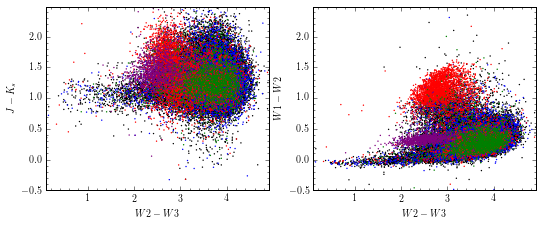

In [135]:
two_cell_plot((sfgal_df.col23, sbgal_df.col23, qso_df.col23, agn_df.col23, lrgs_df.col23),
              (sfgal_df.col23, sbgal_df.col23, qso_df.col23, agn_df.col23, lrgs_df.col23),
              (sfgal_df.coljk, sbgal_df.coljk, qso_df.coljk, agn_df.coljk, lrgs_df.coljk),
              (sfgal_df.col12, sbgal_df.col12, qso_df.col12, agn_df.col12, lrgs_df.col12),
              xlabels_arr=["$W2-W3$", "$W2-W3$"], ylabels_arr=["$J-K_s$","$W1-W2$"],
              orientation="horizontal", xlim_arr=[[0.1, 4.9], [0.1, 4.9]],
              ylim_arr=[[-0.5, 2.49],[-0.5, 2.49]], multi=True)

In [138]:
locus = add_colors(pd.read_csv("../contaminants/allwise_lmc_locus.dat", sep=","))
locus_table = single_pop_table(locus, "Stars from the LMC Stellar Locus")
# locus_cuts_table.original_number = 25,254
locus_table.add_cut("WISE saturation w/ K", locus.kmag > 8.5)
locus_table.add_cut("WISE W1 faint limit", locus.w1 < 16.83)
locus_table.add_cut("WISE W2 faint limit", locus.w2 < 15.6)
locus_table.add_cut("WISE W3 faint limit", locus.w3 < 11.32)
locus_table.add_cut("2MASS K faint limit", locus.kmag < 15.5)
locus_table.add_cut("WISE W1/2/3 SNR > 3", (locus.w1snr > 3) & (locus.w2snr > 3) & (locus.w3snr > 3))
locus_table.add_cut("W1/2/3 CC flag = 0", locus.ccflag.map(lambda flag: flag.startswith("000")))

In [144]:
locus_table.list_compounded_cuts()
locus_df = locus_table.get_compounded_cuts()

Stars from the LMC Stellar Locus
Cut				Count	% Retention
---------------------------------------------------------
Original:			25254	100.00
+ WISE saturation w/ K:		25156	99.6119426625
+ WISE W1 faint limit:		25154	99.604023125
+ WISE W2 faint limit:		24382	96.5470816504
+ WISE W3 faint limit:		3154	12.4891106359
+ 2MASS K faint limit:		3070	12.156490061
+ WISE W1/2/3 SNR > 3:		3056	12.1010532985
+ W1/2/3 CC flag = 0:		3056	12.1010532985



## Calculating Completeness and Contamination Fractions

In [146]:
len(locus_df)

3056

In [140]:
# Conversion factor for SDSS objects. SDSS DR7 photometry surveyed an area of
# 10,417 sq. degrees. The LMC is 76.5 square degrees in area. Need to convert
# from number density from the SDSS footprint to estimated numbers in the LMC
area_conv = 76.5/10417

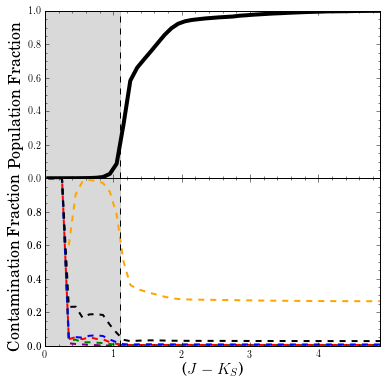

OGLE AGBs retained (%) 91.29 (7718)

Stellar Locus contamination (%) 4.86 (394)
LRG contamination (%) 0.08 (998)
QSO contamination (%) 0.25 (3915)
AGN contamination (%) 0.13 (1730)
SF Gal contamination (%) 0.56 (24092)
SB Gal contamination (%) 0.33 (6157)


In [162]:
bins = np.arange(0, 5+0.1, 0.1)
jklim = 1.1

H_loc, edges = np.histogram(locus_df.coljk, bins=bins)
H_ow, edges = np.histogram(ogle_wise_df.coljk, bins=bins)
H_lrg, edges = np.histogram(lrgs_df.coljk, bins=bins)
# H_yso, edges = np.histogram(ysos[ysoscut].coljk, bins=bins)
H1, edges = np.histogram(qso_df.coljk, bins=bins) # QSO
H2, edges = np.histogram(agn_df.coljk, bins=bins) # AGN
H3, edges = np.histogram(sfgal_df.coljk, bins=bins) # SF
H4, edges = np.histogram(sbgal_df.coljk, bins=bins) # SB

dx = (edges[1]-edges[0])/2.

fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(hspace=0)
ax1 = fig.add_subplot(211)
ax1.plot(edges[:-1]+dx, H_ow.cumsum()/float(H_ow.sum()), color="k", linewidth=4)
ax1.plot([jklim, jklim], [0,1.0], color='k', linestyle="--")
ax1.fill_between([bins[0], jklim], [0,0], [1.0,1.0], color='k', alpha=0.15)

ax2 = fig.add_subplot(212)
ax2.plot(edges[:-1]+dx, H_loc.cumsum()/(H_loc.cumsum(dtype=float) + H_ow.cumsum()), color="orange", linewidth=2, linestyle="--")
ax2.plot(edges[:-1]+dx, H_lrg.cumsum()*area_conv/(H_lrg.cumsum(dtype=float)*area_conv + H_ow.cumsum()), color="purple", linewidth=2, linestyle="--")
# ax2.plot(edges[:-1]+dx, H_yso.cumsum()/float(H_yso.sum()), color="r", linestyle=":")
ax2.plot(edges[:-1]+dx, H1.cumsum()*area_conv/(H1.cumsum(dtype=float)*area_conv + H_ow.cumsum()), color="r", linewidth=2, linestyle="--")
ax2.plot(edges[:-1]+dx, H2.cumsum()*area_conv/(H2.cumsum(dtype=float)*area_conv + H_ow.cumsum()), color="g", linewidth=2, linestyle="--")
ax2.plot(edges[:-1]+dx, H4.cumsum()*area_conv/(H4.cumsum(dtype=float)*area_conv + H_ow.cumsum()), color="b", linewidth=2, linestyle="--")
ax2.plot(edges[:-1]+dx, H3.cumsum()*area_conv/(H3.cumsum(dtype=float)*area_conv + H_ow.cumsum()), color="k", linewidth=2, linestyle="--")
ax2.plot([jklim, jklim], [0,1.0], color='k', linestyle="--")
ax2.fill_between([bins[0], jklim], [0,0], [1.0,1.0], color='k', alpha=0.15)

# ============ Labels and such

ax1.minorticks_on()
ax1.set_xlim(bins[0], bins[-2])
ax1.set_xticklabels([])
ax1.set_ylabel("Population Fraction", fontsize=16)

ax2.minorticks_on()
ax2.set_xlim(bins[0], bins[-2])
ax2.set_xlabel("($J-K_S$)", fontsize=16)
ax2.set_yticklabels([0.0, 0.2, 0.4, 0.6, 0.8])
ax2.set_ylabel("Contamination Fraction", fontsize=16)
plt.savefig("../figures/completeness_contamination_jkcut.pdf")
plt.show()

N_ogle = sum(ogle_wise_df.coljk > jklim)
N_locus = sum(locus_df.coljk > jklim)
N_lrgs = sum(lrgs_df.coljk > jklim)
N_qso = sum(qso_df.coljk > jklim)
N_agn = sum(agn_df.coljk > jklim)
N_sfgal = sum(sfgal_df.coljk > jklim)
N_sbgal = sum(sbgal_df.coljk > jklim)

print "OGLE AGBs retained (%%) %.2f (%g)\n" % (N_ogle * 1.0 / len(ogle_wise_df) * 100, N_ogle)
print "Stellar Locus contamination (%%) %.2f (%g)" % (N_locus * 1.0 / (N_locus + N_ogle) * 100, N_locus)
print "LRG contamination (%%) %.2f (%g)" % (N_lrgs * area_conv / (N_lrgs + N_ogle) * 100, N_lrgs)
print "QSO contamination (%%) %.2f (%g)" % (N_qso * area_conv / (N_qso + N_ogle) * 100, N_qso)
print "AGN contamination (%%) %.2f (%g)" % (N_agn * area_conv / (N_agn + N_ogle) * 100, N_agn)
print "SF Gal contamination (%%) %.2f (%g)" % (N_sfgal * area_conv / (N_sfgal + N_ogle) * 100, N_sfgal)
print "SB Gal contamination (%%) %.2f (%g)" % (N_sbgal * area_conv / (N_sbgal + N_ogle) * 100, N_sbgal)


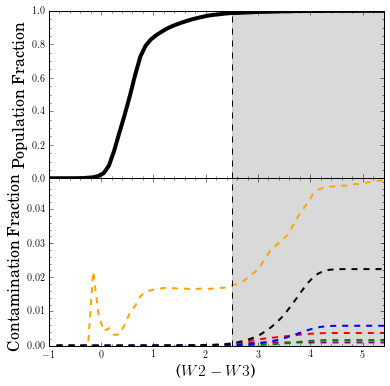

OGLE AGBs retained (%) 90.03 (7611)

Stellar Locus contamination (%) 1.73 (134)
LRG contamination (%) 0.04 (470)
QSO contamination (%) 0.03 (311)
AGN contamination (%) 0.00 (36)
SF Gal contamination (%) 0.05 (613)
SB Gal contamination (%) 0.01 (152)


In [163]:
bins = np.arange(-1, 5.5+0.1, 0.1)
jklim = 1.1
w23hi = 2.5

H_loc, edges = np.histogram(locus_df[locus_df.coljk > jklim].col23, bins=bins)
H_ow, edges = np.histogram(ogle_wise_df[ogle_wise_df.coljk > jklim].col23, bins=bins)
H_lrg, edges = np.histogram(lrgs_df[lrgs_df.coljk > jklim].col23, bins=bins)
# H_yso, edges = np.histogram(ysos[ysoscut].coljk, bins=bins)
H1, edges = np.histogram(qso_df[qso_df.coljk > jklim].col23, bins=bins) # QSO
H2, edges = np.histogram(agn_df[agn_df.coljk > jklim].col23, bins=bins) # AGN
H3, edges = np.histogram(sfgal_df[sfgal_df.coljk > jklim].col23, bins=bins) # SF
H4, edges = np.histogram(sbgal_df[sbgal_df.coljk > jklim].col23, bins=bins) # SB

dx = (edges[1]-edges[0])/2.

fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(hspace=0)
ax1 = fig.add_subplot(211)
ax1.plot(edges[:-1]+dx, H_ow.cumsum()/float(H_ow.sum()), color="k", linewidth=4)
ax1.plot([w23hi, w23hi], [0,1.0], color='k', linestyle="--")
ax1.fill_between([w23hi, bins[-1]], [0,0], [1.0,1.0], color='k', alpha=0.15)

ax2 = fig.add_subplot(212)
ax2.plot(edges[:-1]+dx, H_loc.cumsum()/(H_loc.cumsum(dtype=float) + H_ow.cumsum()), color="orange", linewidth=2, linestyle="--")
ax2.plot(edges[:-1]+dx, H_lrg.cumsum()*area_conv/(H_lrg.cumsum(dtype=float)*area_conv + H_ow.cumsum()), color="purple", linewidth=2, linestyle="--")
# ax2.plot(edges[:-1]+dx, H_yso.cumsum()/float(H_yso.sum()), color="r", linestyle=":")
ax2.plot(edges[:-1]+dx, H1.cumsum()*area_conv/(H1.cumsum(dtype=float)*area_conv + H_ow.cumsum()), color="r", linewidth=2, linestyle="--")
ax2.plot(edges[:-1]+dx, H2.cumsum()*area_conv/(H2.cumsum(dtype=float)*area_conv + H_ow.cumsum()), color="g", linewidth=2, linestyle="--")
ax2.plot(edges[:-1]+dx, H4.cumsum()*area_conv/(H4.cumsum(dtype=float)*area_conv + H_ow.cumsum()), color="b", linewidth=2, linestyle="--")
ax2.plot(edges[:-1]+dx, H3.cumsum()*area_conv/(H3.cumsum(dtype=float)*area_conv + H_ow.cumsum()), color="k", linewidth=2, linestyle="--")
ax2.plot([w23hi, w23hi], [0,1.0], color='k', linestyle="--")
ax2.fill_between([w23hi, bins[-1]], [0,0], [1.0,1.0], color='k', alpha=0.15)

# ============ Labels and such

ax1.minorticks_on()
ax1.set_xlim(bins[0], bins[-2])
ax1.set_xticklabels([])
ax1.set_ylabel("Population Fraction", fontsize=16)

ax2.minorticks_on()
ax2.set_xlim(bins[0], bins[-2])
ax2.set_xlabel("($W2-W3$)", fontsize=16)
ax2.set_ylim(0,0.049)
# ax2.set_yticklabels([0.0, 0.2, 0.4, 0.6, 0.8])
ax2.set_ylabel("Contamination Fraction", fontsize=16)
plt.savefig("../figures/completeness_contamination_w23cut.pdf")
plt.show()

N_ogle = sum((ogle_wise_df.coljk > jklim) & (ogle_wise_df.col23 < w23hi))
N_locus = sum((locus_df.coljk > jklim) & (locus_df.col23 < w23hi))
N_lrgs = sum((lrgs_df.coljk > jklim) & (lrgs_df.col23 < w23hi))
N_qso = sum((qso_df.coljk > jklim) & (qso_df.col23 < w23hi))
N_agn = sum((agn_df.coljk > jklim) & (agn_df.col23 < w23hi))
N_sfgal = sum((sfgal_df.coljk > jklim) & (sfgal_df.col23 < w23hi))
N_sbgal = sum((sbgal_df.coljk > jklim) & (sbgal_df.col23 < w23hi))

print "OGLE AGBs retained (%%) %.2f (%g)\n" % (N_ogle * 1.0 / len(ogle_wise_df) * 100, N_ogle)
print "Stellar Locus contamination (%%) %.2f (%g)" % (N_locus * 1.0 / (N_locus + N_ogle) * 100, N_locus)
print "LRG contamination (%%) %.2f (%g)" % (N_lrgs * area_conv / (N_lrgs + N_ogle) * 100, N_lrgs)
print "QSO contamination (%%) %.2f (%g)" % (N_qso * area_conv / (N_qso + N_ogle) * 100, N_qso)
print "AGN contamination (%%) %.2f (%g)" % (N_agn * area_conv / (N_agn + N_ogle) * 100, N_agn)
print "SF Gal contamination (%%) %.2f (%g)" % (N_sfgal * area_conv / (N_sfgal + N_ogle) * 100, N_sfgal)
print "SB Gal contamination (%%) %.2f (%g)" % (N_sbgal * area_conv / (N_sbgal + N_ogle) * 100, N_sbgal)


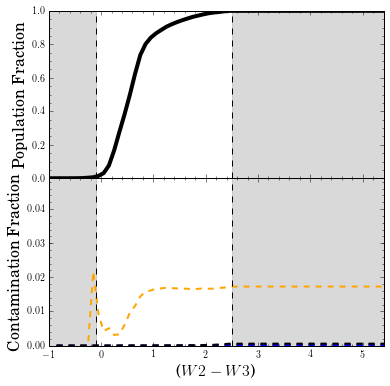

OGLE AGBs retained (%) 89.50 (7566)

Stellar Locus contamination (%) 1.73 (133)
LRG contamination (%) 0.04 (470)
QSO contamination (%) 0.03 (311)
AGN contamination (%) 0.00 (36)
SF Gal contamination (%) 0.06 (613)
SB Gal contamination (%) 0.01 (152)


In [164]:
bins = np.arange(-1, 5.5+0.1, 0.1)
jklim = 1.1
w23hi = 2.5
w23lo = -0.1

H_loc, edges = np.histogram(locus_df[(locus_df.coljk > jklim) & (locus_df.col23 < w23hi)].col23, bins=bins)
H_ow, edges = np.histogram(ogle_wise_df[(ogle_wise_df.coljk > jklim) & (ogle_wise_df.col23 < w23hi)].col23, bins=bins)
H_lrg, edges = np.histogram(lrgs_df[(lrgs_df.coljk > jklim) & (lrgs_df.col23 < w23hi)].col23, bins=bins)
# H_yso, edges = np.histogram(ysos[ysoscut].coljk, bins=bins)
H1, edges = np.histogram(qso_df[(qso_df.coljk > jklim) & (qso_df.col23 < w23hi)].col23, bins=bins) # QSO
H2, edges = np.histogram(agn_df[(agn_df.coljk > jklim) & (agn_df.col23 < w23hi)].col23, bins=bins) # AGN
H3, edges = np.histogram(sfgal_df[(sfgal_df.coljk > jklim) & (sfgal_df.col23 < w23hi)].col23, bins=bins) # SF
H4, edges = np.histogram(sbgal_df[(sbgal_df.coljk > jklim) & (sbgal_df.col23 < w23hi)].col23, bins=bins) # SB

dx = (edges[1]-edges[0])/2.

fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(hspace=0)
ax1 = fig.add_subplot(211)
ax1.plot(edges[:-1]+dx, H_ow.cumsum()/float(H_ow.sum()), color="k", linewidth=4)
ax1.plot([w23hi, w23hi], [0,1.0], color='k', linestyle="--")
ax1.plot([w23lo, w23lo], [0,1.0], color='k', linestyle="--")
ax1.fill_between([w23hi, 10], [0,0], [1.0,1.0], color='k', alpha=0.15)
ax1.fill_between([bins[0], w23lo], [0,0], [1.0,1.0], color='k', alpha=0.15)

ax2 = fig.add_subplot(212)
ax2.plot(edges[:-1]+dx, H_loc.cumsum()/(H_loc.cumsum(dtype=float) + H_ow.cumsum()), color="orange", linewidth=2, linestyle="--")
ax2.plot(edges[:-1]+dx, H_lrg.cumsum()*area_conv/(H_lrg.cumsum(dtype=float)*area_conv + H_ow.cumsum()), color="purple", linewidth=2, linestyle="--")
# ax2.plot(edges[:-1]+dx, H_yso.cumsum()/float(H_yso.sum()), color="r", linestyle=":")
ax2.plot(edges[:-1]+dx, H1.cumsum()*area_conv/(H1.cumsum(dtype=float)*area_conv + H_ow.cumsum()), color="r", linewidth=2, linestyle="--")
ax2.plot(edges[:-1]+dx, H2.cumsum()*area_conv/(H2.cumsum(dtype=float)*area_conv + H_ow.cumsum()), color="g", linewidth=2, linestyle="--")
ax2.plot(edges[:-1]+dx, H4.cumsum()*area_conv/(H4.cumsum(dtype=float)*area_conv + H_ow.cumsum()), color="b", linewidth=2, linestyle="--")
ax2.plot(edges[:-1]+dx, H3.cumsum()*area_conv/(H3.cumsum(dtype=float)*area_conv + H_ow.cumsum()), color="k", linewidth=2, linestyle="--")
ax2.plot([w23hi, w23hi], [0,1.0], color='k', linestyle="--")
ax2.plot([w23lo, w23lo], [0,1.0], color='k', linestyle="--")
ax2.fill_between([w23hi, 10], [0,0], [1.0,1.0], color='k', alpha=0.15)
ax2.fill_between([bins[0], w23lo], [0,0], [1.0,1.0], color='k', alpha=0.15)

# ============ Labels and such

ax1.minorticks_on()
ax1.set_xlim(bins[0], bins[-2])
ax1.set_xticklabels([])
ax1.set_ylabel("Population Fraction", fontsize=16)

ax2.minorticks_on()
ax2.set_xlim(bins[0], bins[-2])
ax2.set_xlabel("($W2-W3$)", fontsize=16)
ax2.set_ylim(0,0.049)
# ax2.set_yticklabels([0.0, 0.2, 0.4, 0.6, 0.8])
ax2.set_ylabel("Contamination Fraction", fontsize=16)
plt.savefig("../figures/completeness_contamination_allcuts.pdf")
plt.show()

N_ogle = sum((ogle_wise_df.coljk > jklim) & (ogle_wise_df.col23 < w23hi) & (ogle_wise_df.col23 > w23lo))
N_locus = sum((locus_df.coljk > jklim) & (locus_df.col23 < w23hi) & (locus_df.col23 > w23lo))
N_lrgs = sum((lrgs_df.coljk > jklim) & (lrgs_df.col23 < w23hi) & (lrgs_df.col23 > w23lo))
N_qso = sum((qso_df.coljk > jklim) & (qso_df.col23 < w23hi) & (qso_df.col23 > w23lo))
N_agn = sum((agn_df.coljk > jklim) & (agn_df.col23 < w23hi) & (agn_df.col23 > w23lo))
N_sfgal = sum((sfgal_df.coljk > jklim) & (sfgal_df.col23 < w23hi) & (sfgal_df.col23 > w23lo))
N_sbgal = sum((sbgal_df.coljk > jklim) & (sbgal_df.col23 < w23hi) & (sbgal_df.col23 > w23lo))

print "OGLE AGBs retained (%%) %.2f (%g)\n" % (N_ogle * 1.0 / len(ogle_wise_df) * 100, N_ogle)
print "Stellar Locus contamination (%%) %.2f (%g)" % (N_locus * 1.0 / (N_locus + N_ogle) * 100, N_locus)
print "LRG contamination (%%) %.2f (%g)" % (N_lrgs * area_conv / (N_lrgs + N_ogle) * 100, N_lrgs)
print "QSO contamination (%%) %.2f (%g)" % (N_qso * area_conv / (N_qso + N_ogle) * 100, N_qso)
print "AGN contamination (%%) %.2f (%g)" % (N_agn * area_conv / (N_agn + N_ogle) * 100, N_agn)
print "SF Gal contamination (%%) %.2f (%g)" % (N_sfgal * area_conv / (N_sfgal + N_ogle) * 100, N_sfgal)
print "SB Gal contamination (%%) %.2f (%g)" % (N_sbgal * area_conv / (N_sbgal + N_ogle) * 100, N_sbgal)


-0.1


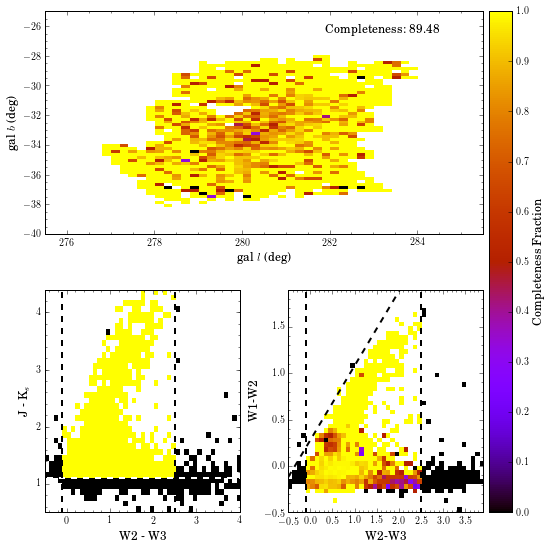

In [213]:
plot_comparison(agb_cuts(ogle_wise_df), ogle_wise_df, binsize=0.2,
                cmap=plt.cm.gnuplot, figsize=(8,8), w23hi=w23hi,
                w23lo=w23lo, jklim=jklim, vmin=0,
                upper=[0.8, 0.28])#outfile="../figures/ogle_completeness_map.png")

## Accounting for YSOs using the Taurus Field

In [166]:
ysos_taurus = pd.read_csv("../contaminants/ysos_taurus_allmags.dat", ",")
ysos_taurus.varflg = ysos_taurus.varflg.astype(str).replace("nan", "nnnn")
ysos_taurus.ccflag = ysos_taurus.ccflag.astype(str).replace("nan", "HHHH")

In [176]:
lmc = pd.read_csv("../contaminants/allwise_lmc_cut.dat", "\t")
lmc = photo_cuts(add_colors(lmc[(lmc.glon < 290) & (lmc.glat > -40)]))

/Users/Nick/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
/Users/Nick/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/Nick/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [175]:
wise_field1 = photo_cuts(read_gator("../yso_work/wise_field1.tbl"))
wise_field2 = photo_cuts(read_gator("../yso_work/wise_field2.tbl"))
wise_field3 = photo_cuts(read_gator("../yso_work/wise_field3.tbl"))
wise_field4 = photo_cuts(read_gator("../yso_work/wise_field4.tbl"))

taurus_field = read_gator("../yso_work/taurus_field.tbl")

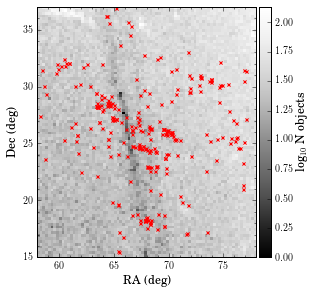

In [179]:
overplot_distr(taurus_field, ysos_taurus, figsize=(4,4),
               colorbar=True)#, savefig="taurus_field_YSOs.pdf")

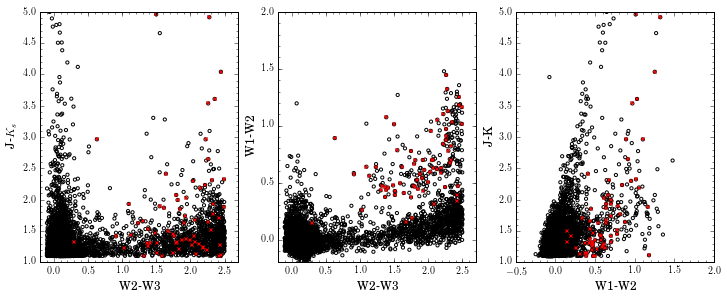

In [180]:
adjust={"left": 0.09, "right":0.87, "top":0.97, "bottom":0.1, "hspace":0.35, "wspace":0.2}
fig = plt.figure(figsize=(12,4))
fig.subplots_adjust(left=adjust["left"], right=adjust["right"], top=adjust["top"], bottom=adjust["bottom"], hspace=adjust["hspace"], wspace=adjust["wspace"])

df1 = agb_cuts(photo_cuts(taurus_field))
df2 = agb_cuts(photo_cuts(ysos_taurus))

ax = fig.add_subplot(131)
xbounds = [-0.2, 2.7]
ybounds = [1.0, 5]
xlim = [xbounds[0], xbounds[1]]
ylim = [ybounds[0], ybounds[1]]

ax.scatter(df1.col23, df1.coljk, s=10, c="None", edgecolor="k", marker="o")
ax.scatter(df2.col23, df2.coljk, s=10, c="r", marker="x")


ax.set_xlabel("W2-W3")
ax.set_xlim(xlim[0], xlim[1])
ax.set_ylabel("J-$K_s$")
ax.set_ylim(ylim[0], ylim[1])
ax.minorticks_on()

ax = fig.add_subplot(132)
xbounds = [-0.2, 2.7]
ybounds = [-0.2, 2]
xlim = [xbounds[0], xbounds[1]]
ylim = [ybounds[0], ybounds[1]]

ax.scatter(df1.col23, df1.col12, s=10, c="None", edgecolor="k", marker="o")
ax.scatter(df2.col23, df2.col12, s=10, c="r", marker="x")


ax.set_xlabel("W2-W3")
ax.set_xlim(xlim[0], xlim[1])
ax.set_ylabel("W1-W2")
ax.set_ylim(ylim[0], ylim[1])
ax.minorticks_on()

ax = fig.add_subplot(133)
xbounds = [-0.5, 2]
ybounds = [1.0, 5]
xlim = [xbounds[0], xbounds[1]]
ylim = [ybounds[0], ybounds[1]]

ax.scatter(df1.col12, df1.coljk, s=10, c="None", edgecolor="k", marker="o")
ax.scatter(df2.col12, df2.coljk, s=10, c="r", marker="x")


ax.set_xlabel("W1-W2")
ax.set_xlim(xlim[0], xlim[1])
ax.set_ylabel("J-K")
ax.set_ylim(ylim[0], ylim[1])
ax.minorticks_on()

# plt.savefig("../figures/ysos_taurus_color.pdf")

plt.show()

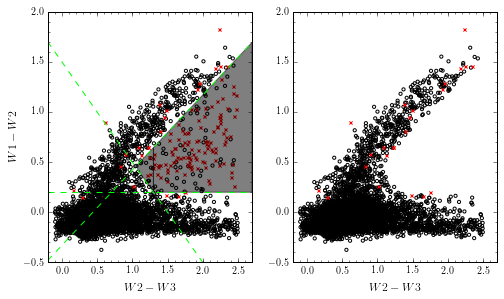

In [187]:
two_cell_comparison(ogle_wise_df, ysos_taurus, "col23", "col12",
                    "$W2-W3$", "$W1-W2$")

In [198]:
N_ogle = len(ogle_wise_df)
N_ogle_cut = len(remove_ysos(agb_cuts(ogle_wise_df)))

N_taurus = len(remove_ysos(agb_cuts(taurus_field)))
N_ysos = len(remove_ysos(agb_cuts(ysos_taurus)))

print "OGLE AGBs Completeness w/ YSO cut: %.2f%% (%g)" % ((N_ogle_cut * 1.0/N_ogle * 100), N_ogle_cut)
print "YSO Contamination in Taurus: %.2f%%" % (N_ysos * 1.0/(N_ysos + N_taurus)*100)

OGLE AGBs Completeness w/ YSO cut: 88.72% (7500)
YSO Contamination in Taurus: 0.17%


## The Distribution of Galactic AGB candidates

In [ ]:
candidates_df1 = standardize(pd.read_csv("../agb_candidates/candidates_region_0.dat", sep=","))
candidates_df2 = standardize(pd.read_csv("../agb_candidates/candidates_region_1.dat", sep=","))
candidates_df3 = standardize(pd.read_csv("../agb_candidates/candidates_region_2.dat", sep=","))
candidates_df4 = standardize(pd.read_csv("../agb_candidates/candidates_region_3.dat", sep=","))
candidates_df5 = standardize(pd.read_csv("../agb_candidates/candidates_region_4.dat", sep=","))
candidates_df6 = standardize(pd.read_csv("../agb_candidates/candidates_region_5.dat", sep=","))

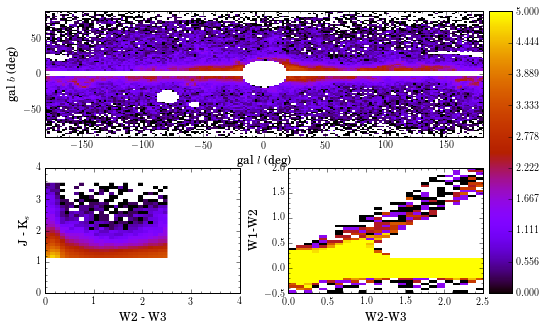

In [237]:
color_and_map(candidates_df1, xlims_map=[-180, 180], ylims_map=[-90, 90],
              cmap=plt.cm.gnuplot)

In [ ]:
color_and_map(candidates_df2, xlims_map=[-180, 180], ylims_map=[-90, 90],
              cmap=plt.cm.gnuplot)

In [ ]:
color_and_map(candidates_df3, xlims_map=[-180, 180], ylims_map=[-90, 90],
              cmap=plt.cm.gnuplot)

In [ ]:
color_and_map(candidates_df4, xlims_map=[-180, 180], ylims_map=[-90, 90],
              cmap=plt.cm.gnuplot)

In [ ]:
color_and_map(candidates_df5, xlims_map=[-180, 180], ylims_map=[-90, 90],
              cmap=plt.cm.gnuplot)

In [ ]:
color_and_map(candidates_df6, xlims_map=[-180, 180], ylims_map=[-90, 90],
              cmap=plt.cm.gnuplot)